#   Exploratory Data Analysis 

##   1. Defining the question 

### a)Specifying the question 

In this project I would like to know whether the bluecars are decreaing in usage

### b) Defining the metric of success

We consider it as a success when we reject the null hypothesis.

### c) Understanding the context


Autolib' was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It closed on 31 July 2018. It was operated by the Bolloré industrial group, and complemented the city's bike sharing system, Velib', which was set up in 2007.

### d) Recording the experimental design 

For this experiment we will be using the Exploratory Data Analysis method

### e) Data Relevance

The data is very relevant

## 2. Reading the data 

In [202]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [203]:
df= pd.read_csv('autolib_daily_events_postal_code.csv')

In [204]:
df1 = pd.read_excel('columns_explanation.xlsx')

## 3. Checking the data

In [205]:
# Previewing the top of our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [206]:
df1.head()

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend


In [207]:
#Determining the number of records in our dataset
print(len(df))
print(len(df1))

16085
13


In [208]:
print(len(df.columns))

13


In [209]:
#Checking if each column has the appropriate data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column name  13 non-null     object
 1   explanation  13 non-null     object
dtypes: object(2)
memory usage: 336.0+ bytes


In [211]:
df['date'] = pd.to_datetime(df['date'])

## 4. Tidying the dataset 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


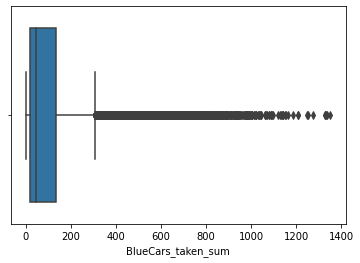

In [213]:
#Checking for outliers
sns.boxplot(df['BlueCars_taken_sum'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


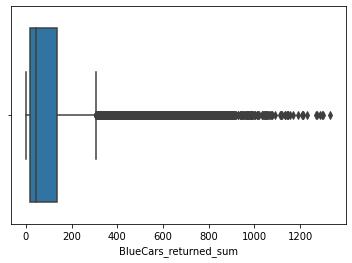

In [56]:
sns.boxplot(df['BlueCars_returned_sum'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


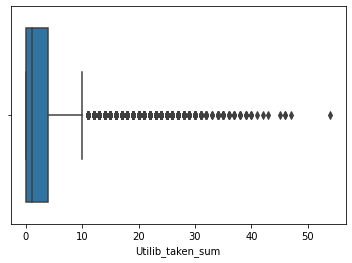

In [57]:
sns.boxplot(df['Utilib_taken_sum'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


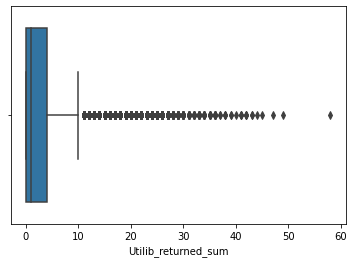

In [58]:
sns.boxplot(df['Utilib_returned_sum'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


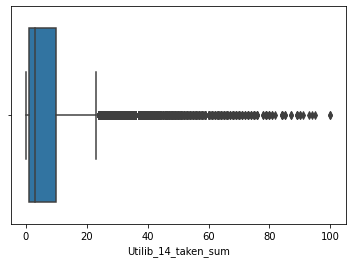

In [59]:
sns.boxplot(df['Utilib_14_taken_sum'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


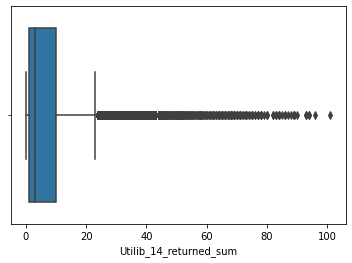

In [60]:
sns.boxplot(df['Utilib_14_returned_sum'])

In [61]:
#Checking for anomalies 
q1 = df['BlueCars_taken_sum'].quantile(.25)
q3= df['BlueCars_taken_sum'].quantile(.75)
iqr = q3 - q1
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
#Checking if there are any values above the whiskers in the data
def over(x):
  for x in df['BlueCars_taken_sum']: 
     if x > u_bound:
       df['BlueCars_taken_sum'] = df.drop(x)
       return 'Anomaly'
     elif x < u_bound:
       continue 
     else:
       break 
over(df)

'Anomaly'

In [73]:
def under(x):
  for x in df['BlueCars_taken_sum']:
    if x < l_bound:
      df['BlueCars_taken_sum']= df.drop(x)
      return 'Anomaly'
    elif x > l_bound:
        continue 
    else:
        break
under(df)

In [62]:
q1 = df['BlueCars_returned_sum'].quantile(.25)
q3= df['BlueCars_returned_sum'].quantile(.75)
iqr = q3 - q1
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
#Checking if there are any values above the whiskers in the data
def over(x):
  for x in df['BlueCars_returned_sum']: 
     if x > u_bound:
       df['BlueCars_returned_sum'] = df.drop(x)
       return 'Anomaly'
     elif x < u_bound:
       continue 
     else:
       break 
over(df)

'Anomaly'

In [63]:
q1 = df['Utilib_taken_sum'].quantile(.25)
q3= df['Utilib_taken_sum'].quantile(.75)
iqr = q3 - q1
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
#Checking if there are any values above the whiskers in the data
def over(x):
  for x in df['Utilib_taken_sum']: 
     if x > u_bound:
       df['Utilib_taken_sum'] = df.drop(x)
       return 'Anomaly'
     elif x < u_bound:
       continue 
     else:
       break 
over(df)

'Anomaly'

In [64]:
q1 = df['Utilib_returned_sum'].quantile(.25)
q3= df['Utilib_returned_sum'].quantile(.75)
iqr = q3 - q1
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
#Checking if there are any values above the whiskers in the data
def over(x):
  for x in df['Utilib_returned_sum']: 
     if x > u_bound:
       df['Utilib_returned_sum'] = df.drop(x)
       return 'Anomaly'
     elif x < u_bound:
       continue 
     else:
       break 
over(df)

'Anomaly'

In [65]:
q1 = df['Utilib_14_taken_sum'].quantile(.25)
q3= df['Utilib_14_taken_sum'].quantile(.75)
iqr = q3 - q1
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
#Checking if there are any values above the whiskers in the data
def over(x):
  for x in df['Utilib_14_taken_sum']: 
     if x > u_bound:
       df['Utilib_14_taken_sum'] = df.drop(x)
       return 'Anomaly'
     elif x < u_bound:
       continue 
     else:
       break 
over(df)

'Anomaly'

In [66]:
q1 = df['Utilib_14_returned_sum'].quantile(.25)
q3= df['Utilib_14_returned_sum'].quantile(.75)
iqr = q3 - q1
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
#Checking if there are any values above the whiskers in the data
def over(x):
  for x in df['Utilib_14_returned_sum']: 
     if x > u_bound:
       df['Utilib_14_returned_sum'] = df.drop(x)
       return 'Anomaly'
     elif x < u_bound:
       continue 
     else:
       break 
over(df)

'Anomaly'

In [187]:
#Checking for missing data 
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
Postal codez_score        0
dtype: int64

## 5. Exploratory Analysis

### Univariate analysis 

In [ ]:
#Plotting the univariate analysis 

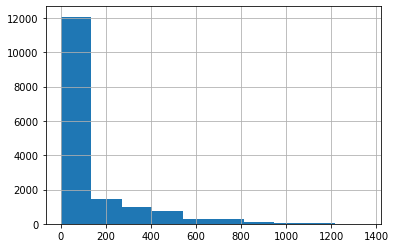

In [92]:
df['BlueCars_taken_sum'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


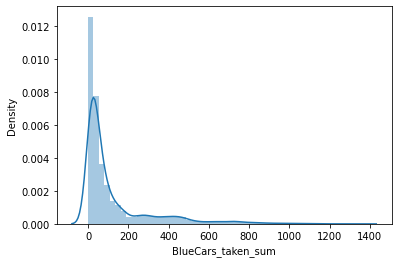

In [93]:
sns.distplot(df['BlueCars_taken_sum'])

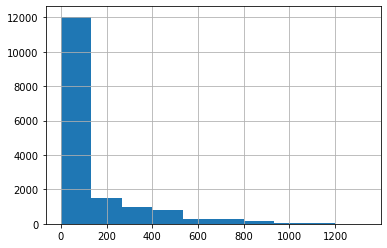

In [94]:
df['BlueCars_returned_sum'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


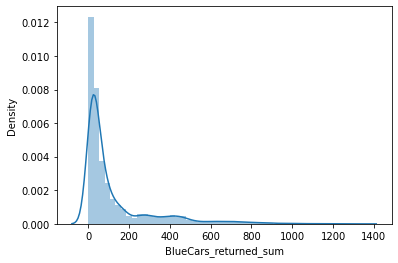

In [95]:
sns.distplot(df['BlueCars_returned_sum'])

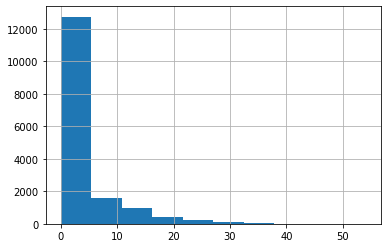

In [96]:
df['Utilib_taken_sum'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


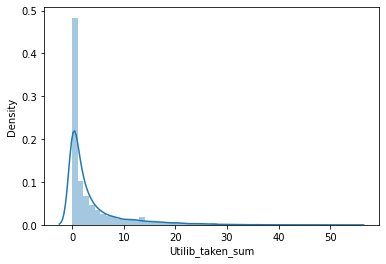

In [97]:
sns.distplot(df['Utilib_taken_sum'])

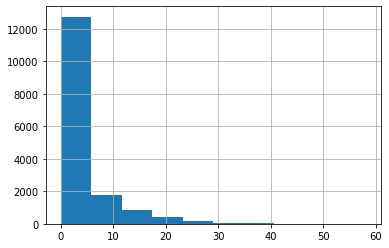

In [98]:
df['Utilib_returned_sum'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


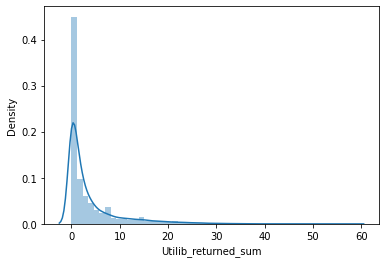

In [99]:
sns.distplot(df['Utilib_returned_sum'])

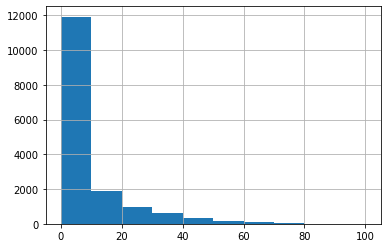

In [100]:
df['Utilib_14_taken_sum'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


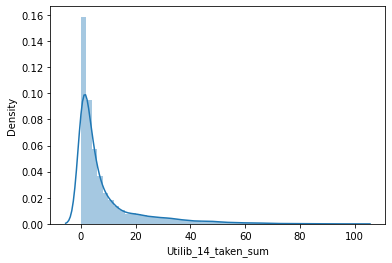

In [101]:
sns.distplot(df['Utilib_14_taken_sum'])

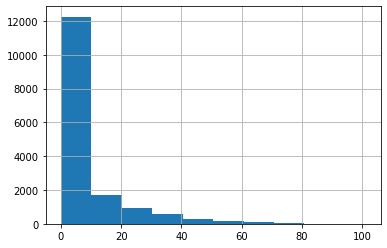

In [102]:
df['Utilib_14_returned_sum'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


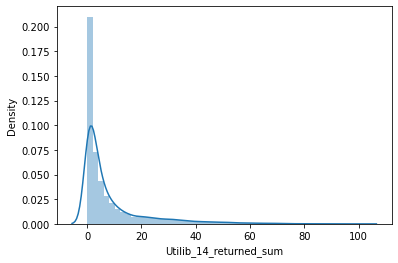

In [103]:
sns.distplot(df['Utilib_14_returned_sum'])

### Bivariate analysis 

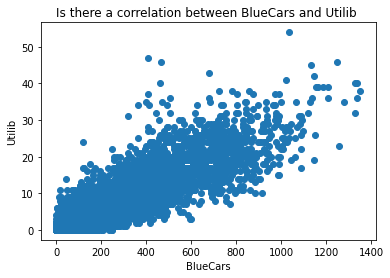

In [108]:
plt.scatter(df['BlueCars_taken_sum'] ,df["Utilib_taken_sum"])
plt.title('Is there a correlation between BlueCars and Utilib ')
plt.xlabel('BlueCars')
plt.ylabel('Utilib')
plt.show()

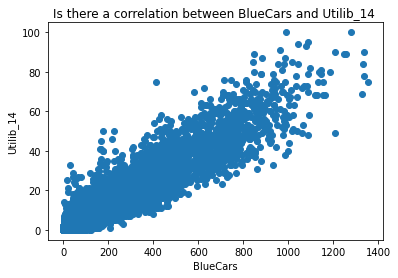

In [109]:
plt.scatter(df['BlueCars_taken_sum'] ,df["Utilib_14_taken_sum"])
plt.title('Is there a correlation between BlueCars and Utilib_14 ')
plt.xlabel('BlueCars')
plt.ylabel('Utilib_14')
plt.show()

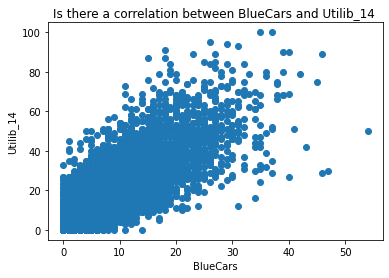

In [110]:
plt.scatter(df['Utilib_taken_sum'] ,df["Utilib_14_taken_sum"])
plt.title('Is there a correlation between BlueCars and Utilib_14 ')
plt.xlabel('BlueCars')
plt.ylabel('Utilib_14')
plt.show()

## 6. Implementing the soloution 

We are going to test if the proportion of bluecars is decreasing, however the data is too large so we need to make a sample. 

In [214]:
from sklearn.cluster import KMeans

In [215]:
x = df.iloc[:,5:]

In [216]:
kmeans = KMeans(20)

kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [217]:
identified_clusters = kmeans.fit_predict(x)

identified_clusters

array([ 6,  6, 13, ..., 12,  0,  0], dtype=int32)

In [224]:
data_with_clusters = df.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Cluster
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20,6
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22,6
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27,13
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21,6
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20,6


In [219]:
working = data_with_clusters[data_with_clusters['Cluster']==3]
num = len(working)

144

Calculating the mean and standard deviations that will be used in the hypothesis testing 

In [220]:
sample_mean = working['BlueCars_taken_sum'].mean()

In [221]:
#Calculating the standard deviation of the sample
working['BlueCars_taken_sum'].std()

39.3236074805403

In [222]:
#Dropping the date column for analysis matters 
working = working.drop('date',axis=1)

In [223]:
# Getting the mean of the population
df['BlueCars_taken_sum'].mean()

125.92695057506994

In [163]:
#Calculating the variance of the sample 
working['BlueCars_taken_sum'].var()

162.2654934063083

In [168]:
# X - B(874,0.14)
# Ho : p = 0.14
# H1 : p < 0.14
#P(X<120)I chose a random number to check if the claim is true 
# X - N(125.67,162.27)
W = (119.5 -125.67) / 12.738347357734767
W 

-0.4451126854031939

In [201]:
Sig_level = 1 - 0.6700
Sig_level

0.32999999999999996

Since the p_value is larger than 0.05 we reject the null hypothesis and show that it is true the number of blue cars has decreased

## 7. Challenging the solution 

Standar error calculation 

In [190]:
std_error = working['BlueCars_taken_sum'].std() / np.sqrt(874)
std_error

0.43088102682173457

A low standard error means that there is 67 percent chance that our statistic values could be wrong.

Point estimator

In [197]:
pop =df['BlueCars_taken_sum'].mean()

In [198]:
sam = working['BlueCars_taken_sum'].mean()

In [199]:
pop - sam

0.2587583553902988

We can see that our sample our estimator over estimates the true mean by 0.259

Interval estimator

In [200]:
stats.norm.interval(0.95, loc=sam, scale=std_error)

(124.82368092548741, 126.51270351387187)